a) No. Training Samples - 8143
   No. Test Samples -  9752

b)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [34]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [35]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [37]:
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(32, activation='softplus'))
model.add(Dense(32, activation='softplus'))
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                96        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [38]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [39]:
fitmodel = model.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 1.3539 - accuracy: 0.7450 - val_loss: 0.6848 - val_accuracy: 0.7992
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7886 - val_loss: 0.4519 - val_accuracy: 0.8033
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.7971 - val_loss: 0.4872 - val_accuracy: 0.8058
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.8021 - val_loss: 0.7969 - val_accuracy: 0.8017
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7804 - val_loss: 1.0953 - val_accuracy: 0.8033


In [40]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 645us/step - loss: 1.0783 - accuracy: 0.8050


In [41]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 581us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.8132 - val_loss: 0.5415 - val_accuracy: 0.7683
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.8125 - val_loss: 0.3978 - val_accuracy: 0.8092
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8236 - val_loss: 0.4486 - val_accuracy: 0.8083
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8186 - val_loss: 0.5837 - val_accuracy: 0.8092
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.8200 - val_loss: 0.6110 - val_accuracy: 0.7833


Text(0, 0.5, 'Accuracy')

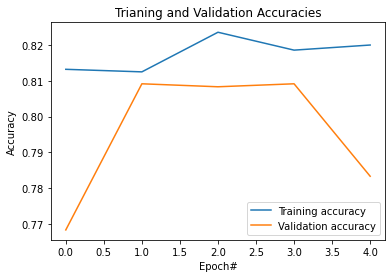

In [42]:
fitModel = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')




Text(0, 0.5, 'Loss')

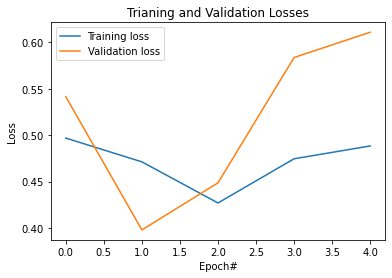

In [43]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

c) This is a three layer model with accuracy 81%

In [44]:
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)


32/32 [==============================] - 0s 573us/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


d) Adding one more hidden layer - 5 Input, Hidden Layer1, Hidden Layer2, Hidden Layer 3 and one output

In [45]:
model_1 = tf.keras.Sequential()
model_1.add(Dense(16, activation='relu',input_shape=(5, ))) 
model_1.add(Dense(32, activation='softplus'))
model_1.add(Dense(32, activation='softplus')) 
model_1.add(Dense(32, activation='softplus')) 
model_1.add(Dense(1, activation='sigmoid')) 

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                96        
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [46]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [47]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 2ms/step - loss: 0.5880 - accuracy: 0.8132 - val_loss: 0.4809 - val_accuracy: 0.8042
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8196 - val_loss: 0.4697 - val_accuracy: 0.8075
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8329 - val_loss: 0.5765 - val_accuracy: 0.8058
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.8179 - val_loss: 0.4275 - val_accuracy: 0.8675
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8400 - val_loss: 0.3928 - val_accuracy: 0.8450


In [48]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 678us/step - loss: 0.3926 - accuracy: 0.8440


In [49]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 549us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8436 - val_loss: 0.4185 - val_accuracy: 0.8367
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8246 - val_loss: 0.3997 - val_accuracy: 0.8475
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.8157 - val_loss: 0.3794 - val_accuracy: 0.8292
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.8139 - val_loss: 0.4628 - val_accuracy: 0.8192
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8425 - val_loss: 0.5942 - val_accuracy: 0.8042


Text(0, 0.5, 'Accuracy')

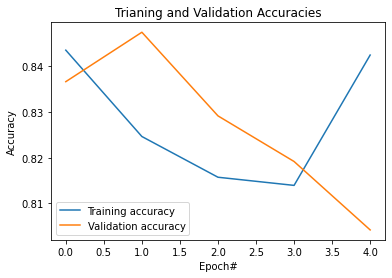

In [50]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

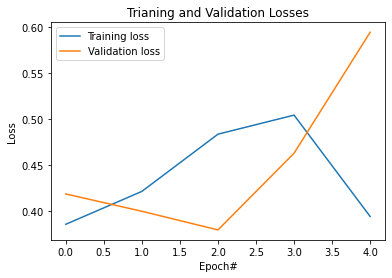

In [51]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')